###  importing dependencies

In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn import metrics # used to evaluate model

### Data collection and processing

In [3]:
calories = pd.read_csv('calories.csv')

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_data = pd.read_csv('exercise.csv')

In [6]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# combine 2 data frames

In [8]:
calories_data = pd.concat([exercise_data , calories['Calories']] , axis=1)

In [9]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
calories_data.shape

(15000, 9)

In [11]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
# checking missing value
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [13]:
# DATA ANALYSIS

In [14]:
#statical measures about data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
# DATA VISUALISATION

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

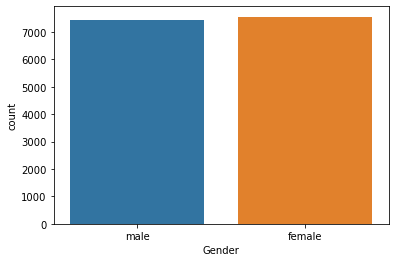

In [16]:
#plotting gender column in count plot -> used for plotting categorical column 
sns.countplot(calories_data['Gender'])

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


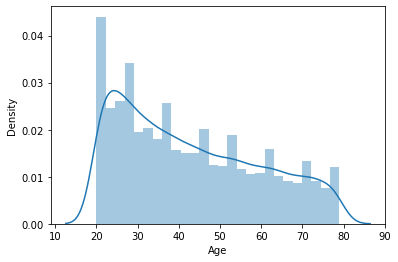

In [17]:
# find the distribution of 'Age' column 
sns.distplot(calories_data['Age'])
plt.show()

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


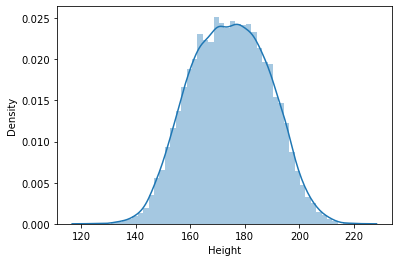

In [18]:
# find the distribution of 'Height' column 
sns.distplot(calories_data['Height'])
plt.show()

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


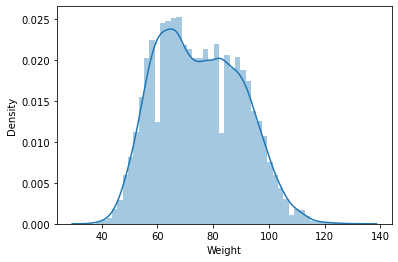

In [19]:
# find the distribution of 'Weight' column 
sns.distplot(calories_data['Weight'])
plt.show()

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


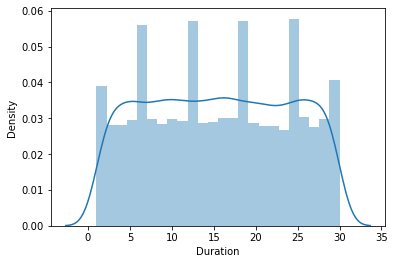

In [20]:
# find the distribution of 'Duration' column 
sns.distplot(calories_data['Duration'])
plt.show()

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


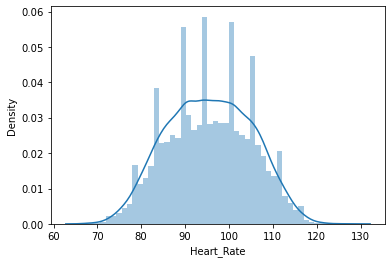

In [21]:
# find the distribution of 'Heart rate' column 
sns.distplot(calories_data['Heart_Rate'])
plt.show()

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


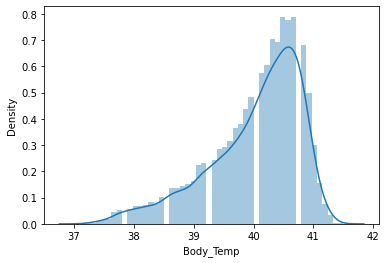

In [22]:
# find the distribution of 'Body temp' column 
sns.distplot(calories_data['Body_Temp'])
plt.show()

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


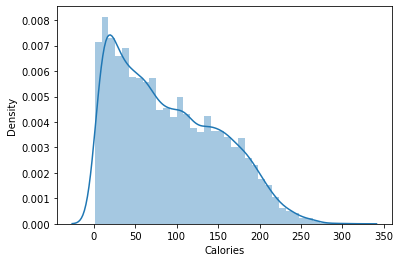

In [23]:
# find the distribution of 'Calories' column 
sns.distplot(calories_data['Calories'])
plt.show()

In [24]:
# FINDING CORRELATION IN DATASET
# 1. Positive -> if one feature increases, second feature also increases, ex - duration and calories are directly proportional , if duration increases calories burnt also increases. These are positively correlated
# 2. Negative

In [25]:
correlation = calories_data.corr()

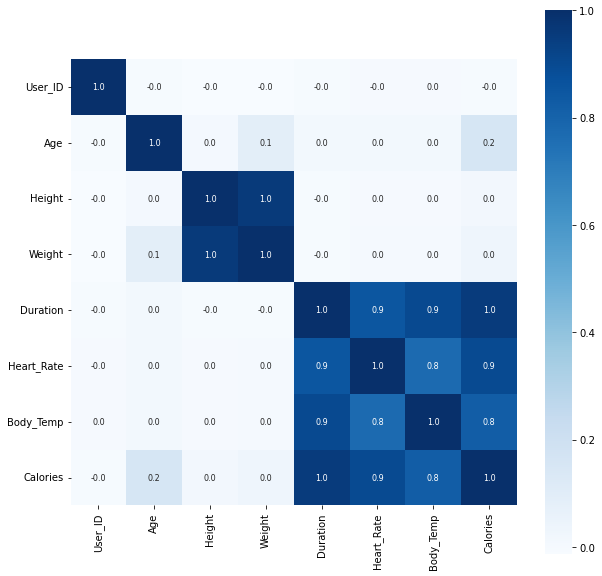

In [26]:
# constructing heatmap to understand correlaton
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [27]:
# Converting text data into numerical values
# in correlation map and describe categorical column will not be displayed
calories_data.replace({"Gender" : {'male':0 , 'female':1}}, inplace=True) # inplace used to change data permanently (throughout)

In [28]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [29]:
# separate features and target columns 
# features -> height, weight, duration ...
# target -> calories
# X represents features and Y represents target



In [30]:
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

In [31]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [32]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [33]:
# splitting data into training and test data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) # 20% data for testing and 80 for training

In [35]:
print(X.shape , X_train.shape , X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


### Model Training

In [36]:
# REGRESSOR

In [37]:
# loading model
model = XGBRegressor()

In [38]:
model.fit(X_train, Y_train) # this data will be given to regressor and it will find the pattern 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
# Evaluate

In [40]:
test_data_prediction = model.predict(X_test)

In [41]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [42]:
# Mean Absolute error -> tell magnitude of error model is making

In [43]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [44]:
print("Mean Absolute Error : " , mae)

Mean Absolute Error :  1.4833678883314132


### Predictive System

In [47]:
# Collect user input
user_gender = int(input("Enter gender (0 for male , 1 for female): "))
user_age = int(input("Enter Age: "))
user_height = float(input("Enter height (in cm): "))
user_weight = float(input("Enter weight "))
user_duration = float(input("Enter duration of exercise (in minutes): "))
user_heart_rate = float(input("Enter heart rate during exercise: "))
user_body_temp = float(input("Enter body temperature: "))


# Create user input DataFrame with additional features
user_data = pd.DataFrame({
    'Gender': [user_gender], 
    'Age': [user_age],    
    'Height': [user_height],
    'Weight': [user_weight], 
    'Duration': [user_duration],
    'Heart_Rate': [user_heart_rate],
    'Body_Temp': [user_body_temp]  
})

# Predict calories burnt
predicted_calories = model.predict(user_data)

# Display predicted calories to user
print()
print("Predicted calories burnt:", predicted_calories[0])

Enter gender (0 for male , 1 for female): 0
Enter Age: 26
Enter height (in cm): 180
Enter weight 81
Enter duration of exercise (in minutes): 60
Enter heart rate during exercise: 100
Enter body temperature: 27

Predicted calories burnt: 144.73288
